# Recommender Systems

*Based on the data from MovieLens and the notebook by Daniil Barysevich*

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data/HW1-data.csv')
data

,User,"Gender (1 =F, 0=M)",260: Star Wars: Episode IV - A New Hope (1977),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),1: Toy Story (1995),2028: Saving Private Ryan (1998),...,2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
0,755,0,1.0,5.0,2.0,NaN,4.0,4.0,2.0,2.0,...,2.0,NaN,5.0,2.0,NaN,4.0,2.0,5.0,NaN,NaN
1,5277,0,5.0,3.0,NaN,2.0,4.0,2.0,1.0,NaN,...,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
2,1577,1,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,...,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
3,4388,0,NaN,3.0,NaN,NaN,NaN,1.0,2.0,3.0,...,NaN,4.0,1.0,3.0,5.0,NaN,5.0,1.0,1.0,2.0
4,1202,1,4.0,3.0,4.0,1.0,4.0,1.0,NaN,4.0,...,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN
5,3823,1,2.0,4.0,4.0,4.0,NaN,NaN,3.0,1.0,...,5.0,2.0,4.0,NaN,1.0,NaN,NaN,3.0,NaN,2.0
6,5448,0,NaN,NaN,3.0,1.0,1.0,4.0,NaN,5.0,...,1.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,5.0,2.0
7,5347,0,4.0,NaN,NaN,NaN,3.0,2.0,2.0,NaN,...,NaN,2.0,3.0,2.0,4.0,NaN,1.0,3.0,5.0,NaN
8,4117,1,5.0,1.0,NaN,4.0,2.0,4.0,4.0,4.0,...,2.0,3.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
9,2765,0,4.0,2.0,NaN,5.0,3.0,NaN,4.0,3.0,...,NaN,NaN,2.0,NaN,NaN,2.0,5.0,1.0,NaN,NaN


In [4]:
# Top movies by mean score
means = data.iloc[:, 2:].mean().sort_values(ascending=False)
means

318: Shawshank Redemption, The (1994)                      3.600000
260: Star Wars: Episode IV - A New Hope (1977)             3.266667
541: Blade Runner (1982)                                   3.222222
1265: Groundhog Day (1993)                                 3.166667
593: Silence of the Lambs, The (1991)                      3.062500
296: Pulp Fiction (1994)                                   3.000000
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3.000000
2028: Saving Private Ryan (1998)                           3.000000
34: Babe (1995)                                            3.000000
527: Schindler's List (1993)                               3.000000
3578: Gladiator (2000)                                     2.916667
2396: Shakespeare in Love (1998)                           2.909091
1198: Raiders of the Lost Ark (1981)                       2.909091
2571: Matrix, The (1999)                                   2.833333
2762: Sixth Sense, The (1999)                   

In [5]:
# Rating counts
counts = data.iloc[:, 2:].count()
counts.sort_values(ascending=False)

1: Toy Story (1995)                                        17
593: Silence of the Lambs, The (1991)                      16
260: Star Wars: Episode IV - A New Hope (1977)             15
1210: Star Wars: Episode VI - Return of the Jedi (1983)    14
780: Independence Day (ID4) (1996)                         13
2762: Sixth Sense, The (1999)                              12
527: Schindler's List (1993)                               12
2571: Matrix, The (1999)                                   12
1265: Groundhog Day (1993)                                 12
2916: Total Recall (1990)                                  12
3578: Gladiator (2000)                                     12
2028: Saving Private Ryan (1998)                           11
1259: Stand by Me (1986)                                   11
296: Pulp Fiction (1994)                                   11
1198: Raiders of the Lost Ark (1981)                       11
2396: Shakespeare in Love (1998)                           11
318: Sha

In [6]:
# Top movies by percentage of positive marks
counts_positive = data.iloc[:, 2:][data.iloc[:, 2:] >= 4].count()
counts_positive.sort_values(ascending=False)
(counts_positive / counts).sort_values(ascending=False)

318: Shawshank Redemption, The (1994)                      0.700000
260: Star Wars: Episode IV - A New Hope (1977)             0.533333
3578: Gladiator (2000)                                     0.500000
541: Blade Runner (1982)                                   0.444444
593: Silence of the Lambs, The (1991)                      0.437500
2571: Matrix, The (1999)                                   0.416667
1265: Groundhog Day (1993)                                 0.416667
34: Babe (1995)                                            0.400000
296: Pulp Fiction (1994)                                   0.363636
2028: Saving Private Ryan (1998)                           0.363636
1259: Stand by Me (1986)                                   0.363636
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.357143
1: Toy Story (1995)                                        0.352941
527: Schindler's List (1993)                               0.333333
2762: Sixth Sense, The (1999)                   

Let's imagine we watched the movie "Toy Story" and we want to have a list of relevant movies to watch next. We can apply association rule here. Let's see the range of movies by the percentage of people who also watched Toy Story:

In [7]:
associative_product = '1: Toy Story (1995)'
watched_product = data.iloc[:, 2:][data[associative_product].notnull()].count()
(watched_product / data[associative_product].count()).sort_values(ascending=False)

1: Toy Story (1995)                                        1.000000
260: Star Wars: Episode IV - A New Hope (1977)             0.823529
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.764706
593: Silence of the Lambs, The (1991)                      0.764706
780: Independence Day (ID4) (1996)                         0.764706
1265: Groundhog Day (1993)                                 0.647059
2916: Total Recall (1990)                                  0.647059
296: Pulp Fiction (1994)                                   0.588235
2762: Sixth Sense, The (1999)                              0.588235
527: Schindler's List (1993)                               0.588235
3578: Gladiator (2000)                                     0.529412
1259: Stand by Me (1986)                                   0.529412
1198: Raiders of the Lost Ark (1981)                       0.529412
2571: Matrix, The (1999)                                   0.529412
2028: Saving Private Ryan (1998)                

Making recommendations above, we did not use data about the user's gender. Statistically, men and women tend to like or dislike different kinds of movies, so, to make non-personalized recommendations more precise, we can take this information into account and see the difference.

In [8]:
# Means separate by gender
gender_column_name = 'Gender (1 =F, 0=M)'
male_means = data.iloc[:, 2:][data[gender_column_name] == 0].mean()
female_means = data.iloc[:, 2:][data[gender_column_name] == 1].mean()

In [9]:
# Male means
male_means.sort_values(ascending=False)

1198: Raiders of the Lost Ark (1981)                       3.666667
527: Schindler's List (1993)                               3.500000
1265: Groundhog Day (1993)                                 3.500000
318: Shawshank Redemption, The (1994)                      3.400000
593: Silence of the Lambs, The (1991)                      3.333333
2571: Matrix, The (1999)                                   3.142857
2028: Saving Private Ryan (1998)                           3.142857
260: Star Wars: Episode IV - A New Hope (1977)             3.125000
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3.000000
1259: Stand by Me (1986)                                   3.000000
541: Blade Runner (1982)                                   3.000000
780: Independence Day (ID4) (1996)                         2.857143
3578: Gladiator (2000)                                     2.833333
2762: Sixth Sense, The (1999)                              2.666667
296: Pulp Fiction (1994)                        

In [10]:
#Female means
female_means.sort_values(ascending=False)

2396: Shakespeare in Love (1998)                           4.250000
296: Pulp Fiction (1994)                                   4.000000
318: Shawshank Redemption, The (1994)                      3.800000
1: Toy Story (1995)                                        3.571429
541: Blade Runner (1982)                                   3.500000
34: Babe (1995)                                            3.428571
260: Star Wars: Episode IV - A New Hope (1977)             3.428571
3578: Gladiator (2000)                                     3.000000
2762: Sixth Sense, The (1999)                              3.000000
356: Forrest Gump (1994)                                   3.000000
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3.000000
1265: Groundhog Day (1993)                                 2.833333
2028: Saving Private Ryan (1998)                           2.750000
593: Silence of the Lambs, The (1991)                      2.714286
780: Independence Day (ID4) (1996)              

In [11]:
# Overall mean ratings 
male_average_mean = data.iloc[:, 2:][data[gender_column_name] == 0].sum().sum() / data.iloc[:, 2:][data[gender_column_name] == 0].count().sum()
female_average_mean = data.iloc[:, 2:][data[gender_column_name] == 1].sum().sum() / data.iloc[:, 2:][data[gender_column_name] == 1].count().sum()
print("Male avg. mean: {} Female avg. mean: {}".format(male_average_mean, female_average_mean))

Male avg. mean: 2.905511811023622 Female avg. mean: 2.9473684210526314


Movies that female users rate higher than male raters:

In [12]:
(female_means - male_means).sort_values(ascending=False)

2396: Shakespeare in Love (1998)                           2.107143
34: Babe (1995)                                            1.428571
296: Pulp Fiction (1994)                                   1.375000
1: Toy Story (1995)                                        1.271429
356: Forrest Gump (1994)                                   0.750000
541: Blade Runner (1982)                                   0.500000
318: Shawshank Redemption, The (1994)                      0.400000
2762: Sixth Sense, The (1999)                              0.333333
260: Star Wars: Episode IV - A New Hope (1977)             0.303571
3578: Gladiator (2000)                                     0.166667
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.000000
780: Independence Day (ID4) (1996)                        -0.190476
2028: Saving Private Ryan (1998)                          -0.392857
2916: Total Recall (1990)                                 -0.485714
1259: Stand by Me (1986)                        

## Personalized Recommendation

All the personalized recommendation require a certain amount of data collected about users. Data could either be collected implicitly and explicitly. Both methods are used widely and can be combined depending on the system restrictions and type of recommendations.

#### Content-based filtering (linear model)

Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document. The user profile is represented with the same terms and built up by analyzing the content of items which have been seen by the user.

In [13]:
raw_data = pd.read_excel("data/cbf.xls", index_col=0)
raw_data

,baseball,economics,politics,Europe,Asia,soccer,war,security,shopping,family,Unnamed: 11,num-attr,Unnamed: 13,User 1,User 2,Unnamed: 16,Pred1,Pred2
doc1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,5.0,NaN,1.0,-1.0,NaN,NaN,NaN
doc2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,4.0,NaN,-1.0,1.0,NaN,NaN,NaN
doc3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
doc4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,4.0,NaN,NaN,1.0,NaN,NaN,NaN
doc5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
doc6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
doc7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
doc8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
doc9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
doc10,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


The file contains topics for the documents and ratings of two users. Let's create two separate dataframes for these data.

In [14]:
docs = raw_data.loc['doc1':'doc20', 'baseball':'family']
docs

,baseball,economics,politics,Europe,Asia,soccer,war,security,shopping,family
doc1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
doc2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
doc3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
doc4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
doc5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
doc6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
doc7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
doc8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
doc9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
doc10,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [15]:
user_ranks = raw_data.loc['doc1':'doc20', 'User 1':'User 2']
#user_ranks.fillna(0, inplace=True)
user_ranks

,User 1,User 2
doc1,1.0,-1.0
doc2,-1.0,1.0
doc3,NaN,NaN
doc4,NaN,1.0
doc5,NaN,NaN
doc6,1.0,NaN
doc7,NaN,NaN
doc8,NaN,NaN
doc9,NaN,NaN
doc10,NaN,NaN


The value of 1.0 means the user liked the document, the value of -1.0 - disliked. NaN means that the user has never seen the document (and we have to predict rating).

In the simplest case, we can learn user profiles using logistic regression corresponding to the binary problem - the probability of an item being liked by the user. Let's train a separate logistic regression model for each user. -1 is converted to 0 to make the logistic regression applicable.

In [16]:
n_users = len(user_ranks.columns)
n_docs = len(user_ranks)
n_features = len(docs.columns)

In [17]:
X_users = [docs.iloc[user_ranks["User {}".format(i+1)].notna().values].values for i in range(n_users)]
Y_users = [user_ranks[user_ranks["User {}".format(i+1)].notna()]["User {}".format(i+1)].values for i in range(n_users)]
# scale labels
Y_users = [(y+1)/2 for y in Y_users]

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr_hyperparams = {'penalty':'l2', 'C':1000, 'solver':'lbfgs'}

In [20]:
user_profiles = [LogisticRegression(**lr_hyperparams) for i in range(n_users)]
user_profiles = [model.fit(X_users[i], Y_users[i]) for i, model in enumerate(user_profiles)]

In [21]:
for i in range(n_users):
    print(80 * '-')
    print("User", i)
    print("Overall bias:", user_profiles[i].intercept_[0])
    print("Preferences by topics:")
    for j in range(n_features):
        print(docs.columns.values[j], '\t',user_profiles[i].coef_[0][j])
# The intercept shows an average bias: User 1 is more positive on average than User 2.
# Other coefficients are contributions of the features: 
# User 1 likes baseball and dislikes economics, etc.
# User 2 dislikes baseball and likes Europe, etc.

--------------------------------------------------------------------------------
User 0
Overall bias: 2.2463670756061926
Preferences by topics:
baseball 	 4.105577694621538
economics 	 -4.117986741738675
politics 	 -2.1376112291176907
Europe 	 -0.11742309778877873
Asia 	 -0.07256926883679429
soccer 	 2.1579588321294207
war 	 -2.052944781457777
security 	 -2.0650419602808956
shopping 	 0.17758331950843798
family 	 -0.07256926883679429
--------------------------------------------------------------------------------
User 1
Overall bias: -0.7911736607563872
Preferences by topics:
baseball 	 -2.79502626828838
economics 	 1.0598592043313977
politics 	 1.6940387606144882
Europe 	 2.76446852295242
Asia 	 -1.0704297623379306
soccer 	 -2.79502626828838
war 	 -0.01998718732942843
security 	 2.76446852295242
shopping 	 0.0
family 	 -1.0704297623379306


Range the documents by the probability of being liked by the users

In [22]:
X = docs.values
docs_names = docs.index.values
for i in range(n_users):
    print(80 * '-')
    print("User", i)
    prob = user_profiles[i].predict_proba(X)
    doc_prob = list(zip(docs_names, prob))
    doc_prob.sort(reverse=True, key=lambda x: x[1][1])
    for j in range(n_docs):
        print(doc_prob[j][0], '\t{:.2f}'.format(doc_prob[j][1][1]))

--------------------------------------------------------------------------------
User 0
doc16 	1.00
doc12 	1.00
doc6 	1.00
doc1 	1.00
doc9 	0.99
doc3 	0.99
doc18 	0.91
doc11 	0.55
doc15 	0.54
doc7 	0.53
doc5 	0.15
doc20 	0.13
doc8 	0.11
doc13 	0.10
doc14 	0.02
doc10 	0.02
doc4 	0.02
doc2 	0.00
doc17 	0.00
doc19 	0.00
--------------------------------------------------------------------------------
User 1
doc2 	1.00
doc17 	1.00
doc4 	1.00
doc13 	1.00
doc14 	0.99
doc20 	0.97
doc8 	0.93
doc18 	0.88
doc15 	0.87
doc7 	0.71
doc11 	0.46
doc19 	0.45
doc5 	0.31
doc6 	0.31
doc10 	0.31
doc3 	0.13
doc9 	0.03
doc16 	0.00
doc12 	0.00
doc1 	0.00


#### Collaborative filtering

Collaborative filtering, also referred to as social filtering, filters information by using the recommendations of other people. It is based on the idea that people who agreed in their evaluation of certain items in the past are likely to agree again in the future. A person who wants to see a movie, for example, might ask for recommendations from friends. The recommendations of some friends who have similar interests are trusted more than recommendations from others. This information is used in the decision on which movie to see.

#####  User-user collaborative filtering

In user-user collaborative filtering, we provide a recommendation based on tastes of other users similar to us. The problem with that algorithm is that we need a lot of information about other people to provide correct recommendations, but the main benefits are effectiveness and ability to provide new, unexpected, and, yet, good recommendations.

In [23]:
data = pd.read_excel("data/data.xls", index_col=0)
data

,11: Star Wars: Episode IV - A New Hope (1977),12: Finding Nemo (2003),13: Forrest Gump (1994),14: American Beauty (1999),22: Pirates of the Caribbean: The Curse of the Black Pearl (2003),24: Kill Bill: Vol. 1 (2003),38: Eternal Sunshine of the Spotless Mind (2004),63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995),77: Memento (2000),85: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),...,8467: Dumb & Dumber (1994),8587: The Lion King (1994),9331: Clear and Present Danger (1994),9741: Unbreakable (2000),9802: The Rock (1996),9806: The Incredibles (2004),10020: Beauty and the Beast (1991),36657: X-Men (2000),36658: X2: X-Men United (2003),36955: True Lies (1994)
1648,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,5.0,3.5,3.0,NaN,3.5,NaN
5136,4.5,5.0,5.0,4.0,5.0,5.0,5.0,3.0,NaN,5.0,...,1.0,5.0,NaN,NaN,NaN,5.0,5.0,4.5,4.0,NaN
918,5.0,5.0,4.5,NaN,3.0,NaN,5.0,NaN,5.0,NaN,...,NaN,5.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
2824,4.5,NaN,5.0,NaN,4.5,4.0,NaN,NaN,5.0,NaN,...,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3867,4.0,4.0,4.5,NaN,4.0,3.0,NaN,NaN,NaN,4.5,...,1.0,4.0,NaN,NaN,NaN,3.0,4.0,4.0,3.5,3.0
860,4.0,4.0,4.5,NaN,2.5,3.0,NaN,4.0,4.5,NaN,...,4.0,4.0,NaN,NaN,3.5,3.5,3.5,NaN,NaN,3.5
3712,NaN,4.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,4.0,4.5,NaN,4.5,4.5,4.0
2968,5.0,4.5,5.0,2.0,5.0,0.5,0.5,2.5,3.0,3.0,...,2.0,5.0,2.5,3.5,5.0,5.0,2.0,5.0,4.5,1.5
3525,4.0,4.0,4.5,3.5,3.0,3.5,4.0,3.5,4.5,4.0,...,4.0,4.5,3.5,3.5,2.5,3.5,4.0,4.0,4.0,3.0
4323,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,3.5,5.0,...,5.0,4.0,3.5,NaN,3.0,4.0,3.0,5.0,5.0,2.0


In [24]:
correlations = data.transpose().corr()
correlations

,1648,5136,918,2824,3867,860,3712,2968,3525,4323,...,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
1648,1.000000,0.402980,-0.142206,0.517620,0.300200,0.480537,-0.312412,0.383348,0.092775,0.098191,...,-0.191988,0.493008,0.360644,0.551089,0.002544,0.116653,-0.429183,0.394371,-0.304422,0.245048
5136,0.402980,1.000000,0.118979,0.057916,0.341734,0.241377,0.131398,0.206695,0.360056,0.033642,...,0.488607,0.328120,0.422236,0.226635,0.305803,0.037769,0.240728,0.411676,0.189234,0.390067
918,-0.142206,0.118979,1.000000,-0.317063,0.294558,0.468333,0.092037,-0.045854,0.367568,-0.035394,...,0.373226,0.470972,0.069956,-0.054762,0.133812,0.015169,-0.273096,0.082528,0.667168,0.119162
2824,0.517620,0.057916,-0.317063,1.000000,-0.060913,-0.008066,0.462910,0.214760,0.169907,0.119350,...,-0.201275,0.228341,0.238700,0.259660,0.247097,0.149247,-0.361466,0.474974,-0.262073,0.166999
3867,0.300200,0.341734,0.294558,-0.060913,1.000000,0.282497,0.400275,0.264249,0.125193,-0.333602,...,0.174085,0.297977,0.476683,0.293868,0.438992,-0.162818,-0.295966,0.054518,0.464110,0.379856
860,0.480537,0.241377,0.468333,-0.008066,0.282497,1.000000,0.171151,0.072927,0.387133,0.146158,...,0.347470,0.399436,0.207314,0.311363,0.276306,0.079698,0.212991,0.165608,0.162314,0.279677
3712,-0.312412,0.131398,0.092037,0.462910,0.400275,0.171151,1.000000,0.065015,0.095623,-0.292501,...,0.016406,-0.240764,-0.115254,0.247693,0.166913,0.146011,0.009685,-0.451625,0.193660,0.113266
2968,0.383348,0.206695,-0.045854,0.214760,0.264249,0.072927,0.065015,1.000000,0.028529,-0.073252,...,0.049132,-0.009041,0.203613,0.033301,0.137982,0.070602,0.109452,-0.083562,-0.089317,0.229219
3525,0.092775,0.360056,0.367568,0.169907,0.125193,0.387133,0.095623,0.028529,1.000000,0.210879,...,0.475711,0.306957,0.136343,0.301750,0.143414,0.056100,0.179908,0.284648,0.170757,0.193131
4323,0.098191,0.033642,-0.035394,0.119350,-0.333602,0.146158,-0.292501,-0.073252,0.210879,1.000000,...,-0.040606,0.155045,-0.204164,0.263654,0.167198,-0.084592,0.315712,0.085673,-0.109892,-0.279385


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

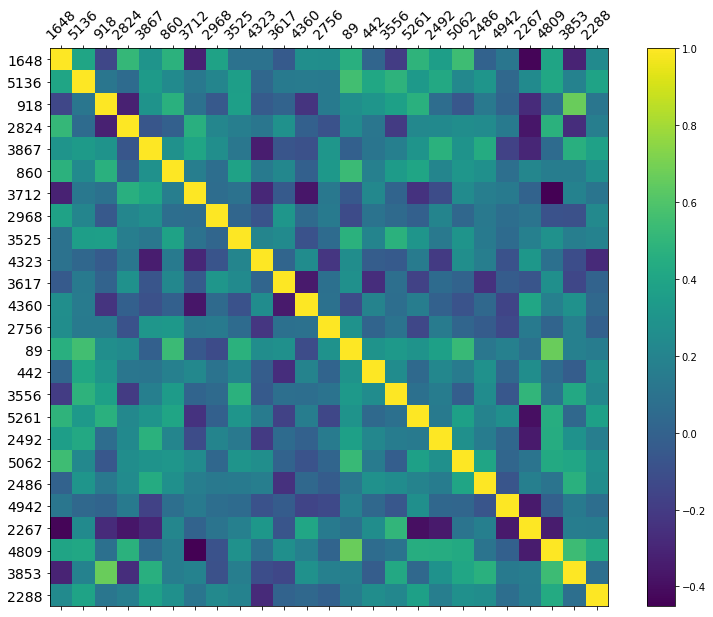

In [26]:
f = plt.figure(figsize=(14, 10))
plt.matshow(correlations, fignum=f.number)
plt.xticks(range(correlations.shape[1]), correlations.columns, fontsize=14, rotation=45)
plt.yticks(range(correlations.shape[1]), correlations.columns, fontsize=14)
cb = plt.colorbar()

In [27]:
# neighborhood size
K = 5
user_id = 3867

In [28]:
# selecting K neighbors 
neighbours_corr = correlations[user_id].sort_values(ascending=False)[1: K+1]
neighbours_corr

2492    0.476683
3853    0.464110
2486    0.438992
3712    0.400275
2288    0.379856
Name: 3867, dtype: float64

In [29]:
neighbours_ratings = data.loc[neighbours_corr.index]
neighbours_ratings

,11: Star Wars: Episode IV - A New Hope (1977),12: Finding Nemo (2003),13: Forrest Gump (1994),14: American Beauty (1999),22: Pirates of the Caribbean: The Curse of the Black Pearl (2003),24: Kill Bill: Vol. 1 (2003),38: Eternal Sunshine of the Spotless Mind (2004),63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995),77: Memento (2000),85: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),...,8467: Dumb & Dumber (1994),8587: The Lion King (1994),9331: Clear and Present Danger (1994),9741: Unbreakable (2000),9802: The Rock (1996),9806: The Incredibles (2004),10020: Beauty and the Beast (1991),36657: X-Men (2000),36658: X2: X-Men United (2003),36955: True Lies (1994)
2492,4.5,3.5,3.5,3.5,4.0,4.0,NaN,4.0,4.0,5.0,...,NaN,4.0,3.0,NaN,3.5,5.0,4.0,3.0,2.0,4.0
3853,NaN,NaN,3.5,NaN,NaN,5.0,5.0,4.0,4.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2486,3.5,2.0,4.5,3.5,2.5,4.5,3.0,3.5,4.5,4.5,...,0.5,0.5,0.5,3.0,2.5,3.0,2.5,3.5,3.0,1.5
3712,NaN,4.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,4.0,4.5,NaN,4.5,4.5,4.0
2288,NaN,3.5,3.5,NaN,3.5,3.0,NaN,5.0,5.0,3.0,...,0.5,NaN,NaN,NaN,4.0,3.5,NaN,4.0,4.0,NaN


Top 5 movies to recommend to the user.

In [30]:
# Find a list of missing ratings for the user
missing_ratings = data.loc[user_id]
missing_ratings = missing_ratings[missing_ratings.isnull()]
missing_ratings

14: American Beauty (1999)                                    NaN
38: Eternal Sunshine of the Spotless Mind (2004)              NaN
63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                 NaN
77: Memento (2000)                                            NaN
105: Back to the Future (1985)                                NaN
107: Snatch (2000)                                            NaN
134: O Brother Where Art Thou? (2000)                         NaN
141: Donnie Darko (2001)                                      NaN
146: Crouching Tiger Hidden Dragon (Wo hu cang long) (2000)   NaN
153: Lost in Translation (2003)                               NaN
187: Sin City (2005)                                          NaN
194: Amelie (2001)                                            NaN
197: Braveheart (1995)                                        NaN
243: High Fidelity (2000)                                     NaN
274: The Silence of the Lambs (1991)                          NaN
275: Fargo

In [31]:
# make predictions
user_mean = data.loc[user_id].mean()
neighbours_means = neighbours_ratings.mean(axis=1)
for movie_name, val in missing_ratings.iteritems():
    rating = 0
    weights_sum = 0
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[movie_name]): continue
        rating += neighbours_corr.loc[neighbour_id] * (row[movie_name] - neighbours_means.loc[neighbour_id])
        weights_sum += abs(neighbours_corr.loc[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += user_mean
    missing_ratings.at[movie_name] = rating
missing_ratings.sort_values(ascending=False)[0:5]

77: Memento (2000)                               4.777803
275: Fargo (1996)                                4.771538
807: Seven (a.k.a. Se7en) (1995)                 4.655569
194: Amelie (2001)                               4.449936
63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    4.396449
Name: 3867, dtype: float64

The output should look like the following:
```
77: Memento (2000)                               4.777803
275: Fargo (1996)                                4.771538
807: Seven (a.k.a. Se7en) (1995)                 4.655569
194: Amelie (2001)                               4.449936
63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    4.396449
```

#####  Item-item collaborative filtering

In item-item collaborative filtering, we provide a recommendation based on other items similar to us. The benefits of it, compared to user-user collaborative filtering, is that we usually need much fewer similarity computations (in most cases, there are much more users in systems than items). The most common pitfall - the system can provide very obvious recommendations.

In [32]:
K = 5
user_id = 3867

In [33]:
correlations = data.corr()

In [34]:
for movie_name, val in missing_ratings.iteritems():
    rating = 0
    weights_sum = 0
    neighbours_corr = correlations[movie_name].sort_values(ascending=False)[1: K+1]
    item_mean = data[movie_name].mean()
    neighbours_ratings = data[neighbours_corr.index].transpose()
    neighbours_means = neighbours_ratings.mean(axis=1)
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[user_id]): continue
        rating += neighbours_corr[neighbour_id] * (row[user_id] - neighbours_means[neighbour_id])
        weights_sum += abs(neighbours_corr[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += item_mean
    missing_ratings.at[movie_name] = rating
missing_ratings.sort_values(ascending=False)[0:5]

77: Memento (2000)                                             4.640297
807: Seven (a.k.a. Se7en) (1995)                               4.481565
146: Crouching Tiger Hidden Dragon (Wo hu cang long) (2000)    4.478644
153: Lost in Translation (2003)                                4.415375
194: Amelie (2001)                                             4.207079
Name: 3867, dtype: float64

In this case, the recommendations using both algorithms are similar. However, it is known that the item-item algorithm produces better recommendations as it is easier to capture the similarity between items rather than users.